# Data

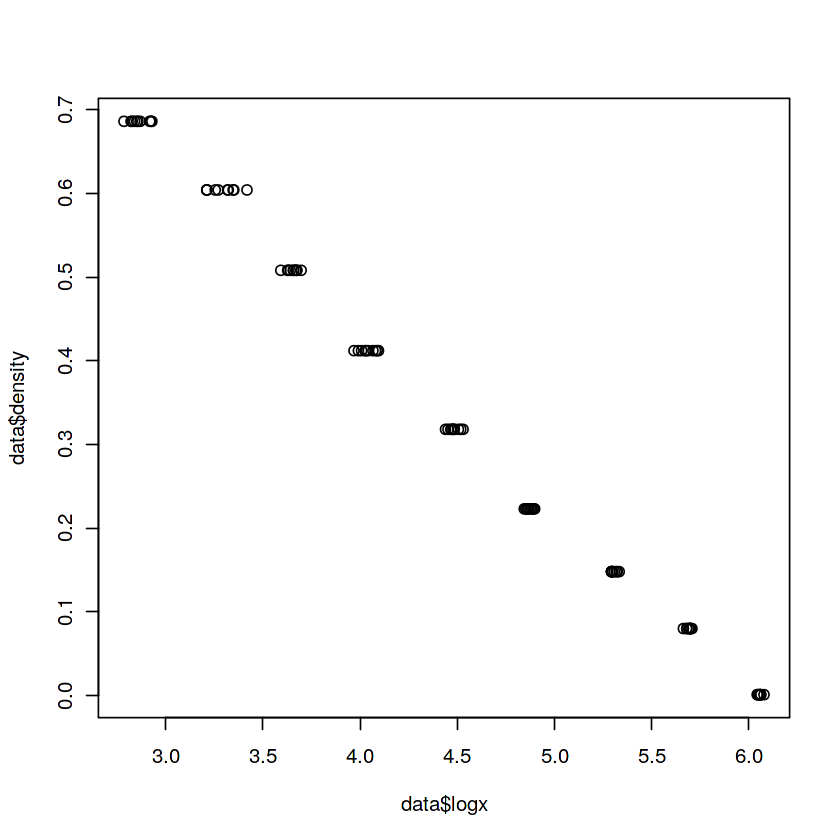

In [74]:
library(ggplot2)
library(readr)

data <- read.table("gauge-1wb1wa6-2gpel41.txt", header = TRUE)
data$logx <- log(data$gain)

# fit is a linear model.
fit <- lm(formula = density ~ gain, data = data)
fit.wls <- lm(density ~ gain, data = data, weights = 1 / data$gain) # weighted least squares.
logxFit <- lm(formula = density ~ logx, data = data) # gain transformed into log(gain).
logxFit.wls <- lm(formula = density ~ logx, data = data, weights = 1 / data$logx) # weighted lease squares with ln(gain).

data$predicted <- predict(fit)
data$logxPredicted <- predict(logxFit)

data$residuals <- residuals(fit) # Save the residual values
data$logxResiduals <- residuals(logxFit)

# for original data gain.
fitTIntercept = 1.2980
fitTGain = -0.2162
WeiTIntercept = 1.3057
WeiTGain =  -0.2179

PredictionT <- function(gain) {
  return(fitTGain * log(gain) + fitTIntercept)
}

PredWeightedT <- function(gain) {
  return(WeiTGain * log(gain) + WeiTIntercept)
}

res.rank <- sort(fit$residuals)
suspect <- which(fit$residuals %in% res.rank[5:20])
fit.out <- lm(formula=density[-suspect]~gain[-suspect], data = data)

#Transformation of gain
plot(x=data$logx, y = data$density)
fitT <- lm(formula = density ~ logx, data = data)

* fit
* residuals
* least squares
* weighted least squares
* prediction
* weighted prediction
* Rsquared

# Data Summary

In [ ]:
head(data)
summary(fit)

# 1. Linear Regression

## a) Linear Regression


Call:
lm(formula = density ~ gain, data = data)

Coefficients:
(Intercept)         gain  
   0.549724    -0.001533  


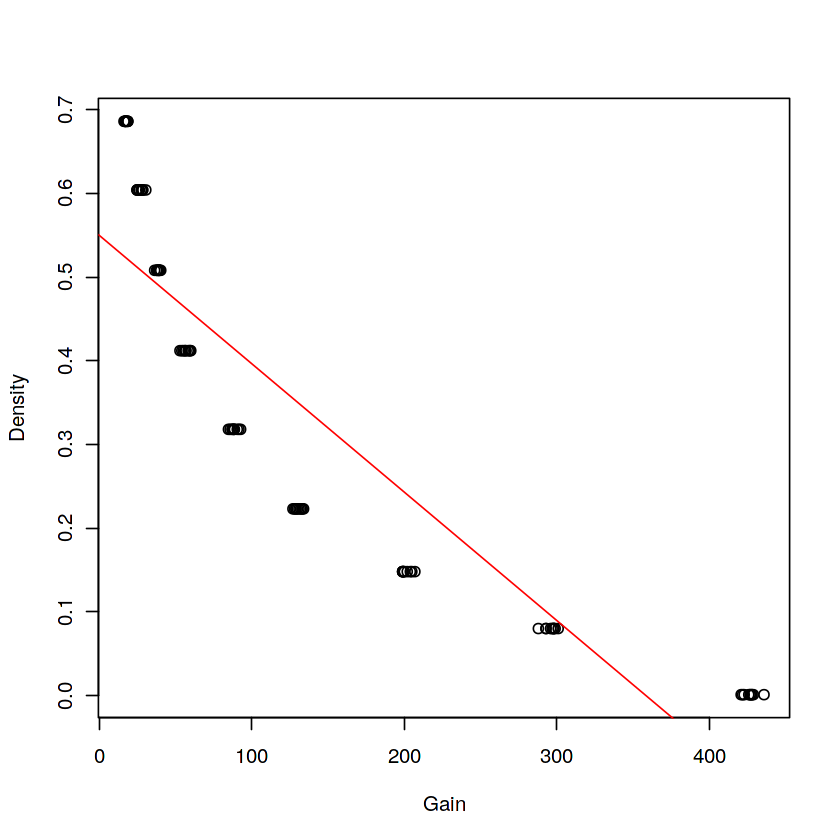

In [89]:
plot(x = data$gain, y = data$density, ylab="Density", xlab="Gain")
fit
abline(fit, col="red")

## b) Regression with Outliers Removed

In [ ]:
plot(x = data$gain, y = data$density, ylab="Density", xlab="Gain")
abline(fit, col="red")
abline(fit.out, col="blue")
#windows(width=20,height=1)
legend(270, 0.6, legend = c("Original Fit", "Fit without Outliers"),col=c(col="red",col="blue"),lwd=2,text.width=120,cex=1)

## c) Transformation of Gain

In [ ]:
plot(x = data$logx, y = data$density, ylab="Density", xlab="Gain")
abline(logxFit, col="blue")

## d) Regression with Outliers Removed Transformation of Gain

In [ ]:
#Outliers removed plot of the Transformation of gain
plot(x = data$logx, y = data$density, main = "log gain outliers removed regression")
abline(logxFit, col="red")
res.rank <- sort(fitT$residuals)
suspectT <- which(fitT$residuals %in% res.rank[70:80])
fitT.out <- lm(formula=density[-suspectT]~logx[-suspectT], data=data)
abline(fitT.out, col="blue")

# Residuals

In [ ]:
plot(fit$residuals, ylab="Residuals", main="Residual Plot")
abline(0, 0, col="red")
hist(fit$residuals, xlab="Resuduals", main ="Histogram of Residuals")
qqnorm(fit$residuals)
# Normality
qqline(fit$residuals, col="red")

# Squared Correlation Coefficient

In [ ]:
R.square <- sum((fit$fitted.values-mean(data$density))^2) / (sum((data$density - mean(data$density))^2))
R.square

# Least Squares

## a) Weighted Least Squares

In [ ]:
plot(x = data$gain, y = data$density, xlab="Gain", ylab="Density", main="Weighted Least Squares")
abline(fit, col="red")
abline(fit.wls, col="blue")
fit
fit.wls

legend(270, 0.6, legend = c("Original Fit", "Weighted Fit"),col=c(col="red",col="blue"),lwd=2,text.width=100,cex=1)

## b) Weighted Least Squares of Transformation of Gain

In [ ]:
#Prediction of Transformation of Gain
# fit.wTls <- lm(density~logx, data=data, weights = 1 / data$logx)
plot(x = data$logx, y = data$density, xlab = "log(gain)", ylab = "density", main ="Weighted Least Squares of log gain Regression")
abline(logxFit, col="red")
abline(logxFit.wls, col="blue")
fitT
fit.wTls

# Predictions

## Predictions of Transformation of Gain

In [121]:
cat("Predicted value of 38.6 in fit: ", predict(fit, data.frame(gain = c(38.6))), "\n")
cat("Predicted value of 426.7 in fit: ", predict(fit, data.frame(gain = c(426.7))), "\n")
cat("Predicted value of 38.6 in weighted fit: ", predict(fit.wls, data.frame(gain = c(38.6))), "\n")
cat("Predicted value of 426.7 in weighted fit: ", predict(fit.wls, data.frame(gain = c(426.7))), "\n")

Predicted value of 38.6 in fit:  0.4905344 
Predicted value of 426.7 in fit:  -0.1045812 
Predicted value of 38.6 in weighted fit:  0.5610738 
Predicted value of 426.7 in weighted fit:  -0.2973603 


Predicted density of log(38.6) in logxFit:  0.5081678 
Predicted density of log(426.7) in logxFit:  -0.01133153 
Predicted density of log(38.6) in weighted logxFit:  0.5095741 
Predicted density of log(426.7) in weighted logxFit:  -0.01405146 


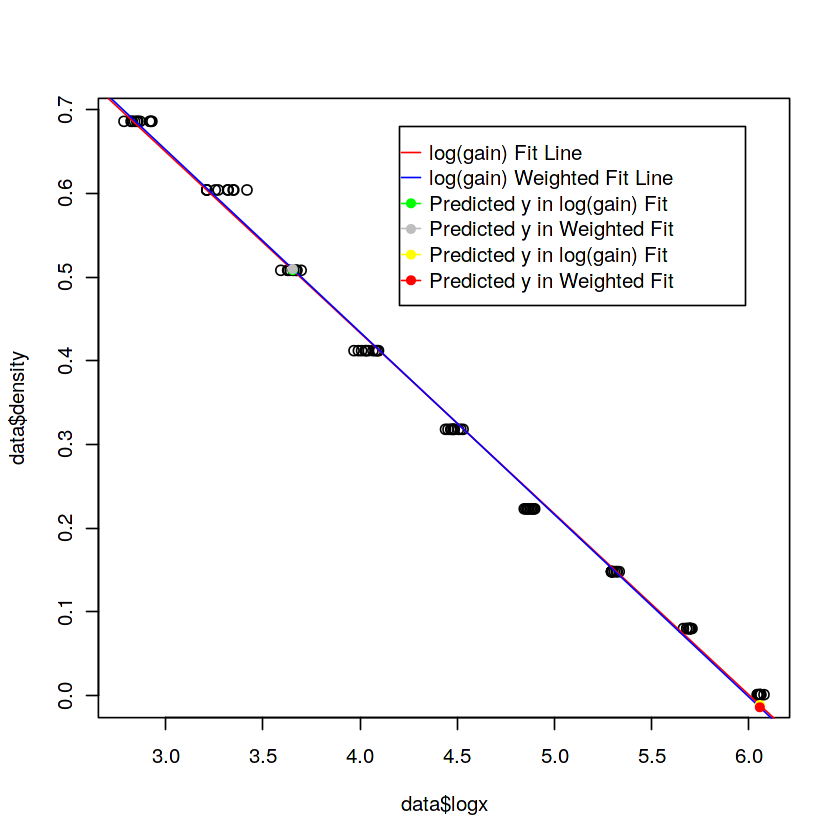

In [94]:
gain1 = log(38.6)
gain2 = log(426.7)
# 1. predicted value on the original graph.
plot(x=data$logx, y = data$density)
abline(logxFit, col="red")
abline(logxFit.wls, col="blue")
# particular values selected.
points(c(gain1), c(predict(logxFit, data.frame(logx = c(gain1)))), pch = 16, col = "green")
points(c(gain1), c(predict(logxFit.wls, data.frame(logx = c(gain1)))), pch = 16, col = "gray")
points(c(gain2), c(predict(logxFit, data.frame(logx = c(gain2)))), pch = 16, col = "yellow")
points(c(gain2), c(predict(logxFit.wls, data.frame(logx = c(gain2)))), pch = 16, col = "red")

legend(4.2, 0.68, 
       legend = c("log(gain) Fit Line", "log(gain) Weighted Fit Line", "Predicted y in log(gain) Fit", "Predicted y in Weighted Fit", "Predicted y in log(gain) Fit", "Predicted y in Weighted Fit"),
       col=c(col="red",col="blue", col="green", col="gray", col="yellow", col="red"),
       lwd=1,
       text.width=1.6,
       cex=1, 
       pch = c(-1,-1, 16, 16, 16, 16))

cat("Predicted density of log(38.6) in logxFit: ", predict(logxFit, data.frame(logx = c(gain1))), "\n")
cat("Predicted density of log(426.7) in logxFit: ", predict(logxFit, data.frame(logx = c(gain2))), "\n")
cat("Predicted density of log(38.6) in weighted logxFit: ", predict(logxFit.wls, data.frame(logx = c(gain1))), "\n")
cat("Predicted density of log(426.7) in weighted logxFit: ", predict(logxFit.wls, data.frame(logx = c(gain2))), "\n")

**Bands around least squares line that can be used to make interval estimates for the snow-pack density from gain measurements**

,fit,lwr,upr
1,0.5081678,0.5042423,0.5120933


,fit,lwr,upr
1,-0.01133153,-0.01695305,-0.005710022


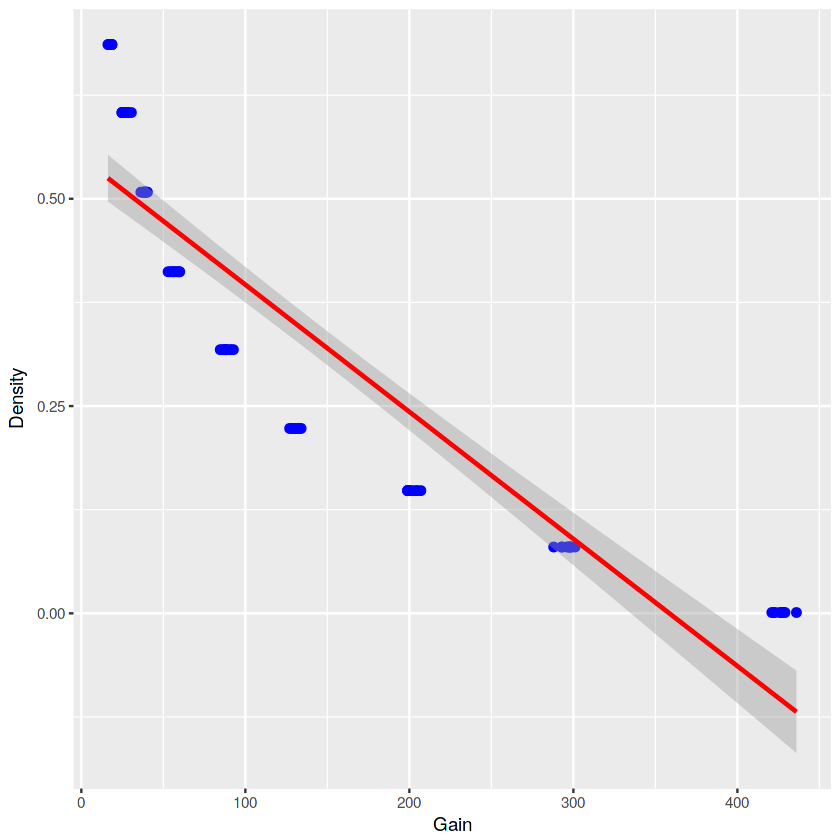

In [88]:
ggplot(data,aes(y = density,x=gain))+geom_point(col="blue",size=2)+labs(x="Gain",y="Density")+stat_smooth(method = "lm", se = TRUE,col='red',level=0.95)
predict(logxFit, data.frame(logx = c(log(38.6))), interval="confidence")
predict(logxFit, data.frame(logx = c(log(426.7))), interval="confidence")

**Diagnostics**

In [ ]:
plot(fit$residuals)
abline(0, 0, col="red")
hist(fit$residuals)
qqnorm(fit$residuals)
qqline(fit$residuals, col="red")

## Residual Plot

In [ ]:
ggplot(data, aes(x = gain, y = density)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +
  geom_segment(aes(xend = gain, yend = predicted), alpha = .2) +

  geom_point(aes(color = residuals)) +  # Color mapped here
  scale_color_gradient2(low = "blue", mid = "white", high = "red") +  # Colors to use here
  guides(color = FALSE) +
  # <

  geom_point(aes(y = predicted), shape = 1) +
  theme_bw() +
  labs(title = "Residuals with gain") +
  xlab("gain") + ylab("density")

# Residual plot with $ \ln{(gain)} $

In [ ]:
ggplot(data, aes(x = data$logx, y = density)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +
  geom_segment(aes(xend = data$logx, yend = logxPredicted), alpha = .2) +

  geom_point(aes(color = logxResiduals)) +  # Color mapped here
  scale_color_gradient2(low = "blue", mid = "white", high = "red") +  # Colors to use here
  guides(color = FALSE) +
  # <

  geom_point(aes(y = logxPredicted), shape = 1) +
  theme_bw() + 
  labs(title = "Residuals with log(gain)") +
  xlab("log(gain)") + ylab("density")

1 
0.5081678

,fit,lwr,upr
1,0.5083037,0.5037362,0.5128712


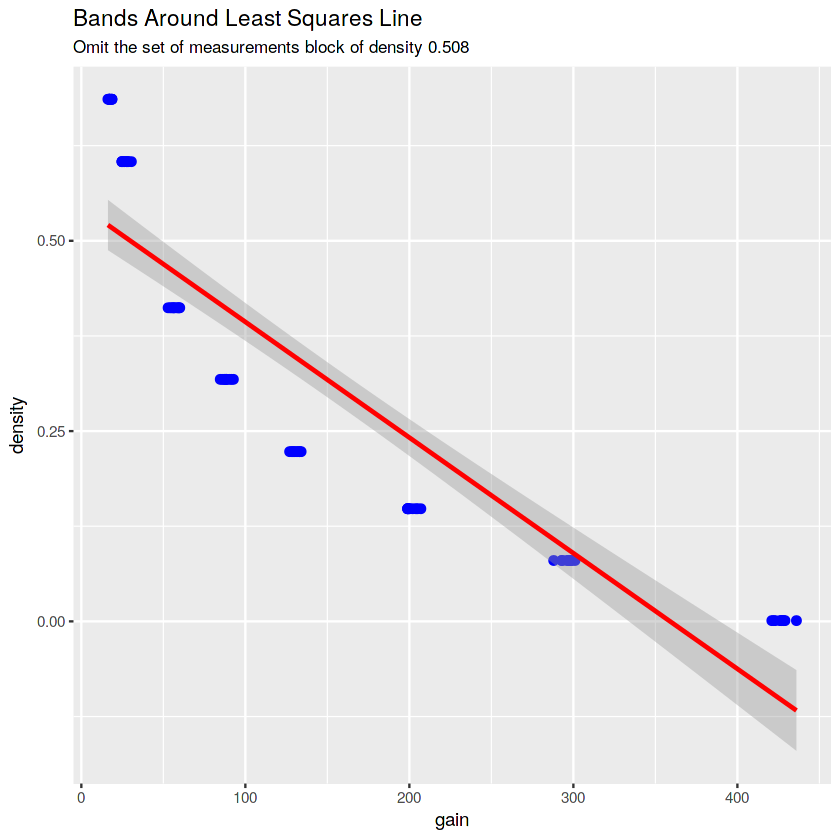

In [120]:
validationData = subset(data, data$density != 0.5080)
crossValidationFitModel <- lm(formula = density ~ logx, data = validationData)
gain1 = log(38.6)
predict(logxFit, data.frame(logx = c(gain1)))
predict(crossValidationFitModel, data.frame(logx = c(gain1)), interval="confidence")
ggplot(validationData,aes(y = density,x=gain))+geom_point(col="blue",size=2)+labs(x="Gain",y="Density")+stat_smooth(method = "lm", se = TRUE,col='red',level=0.95) +
  labs(title = "Bands Around Least Squares Line", subtitle = "Omit the set of measurements block of density 0.508") +
  xlab("gain") + ylab("density")

# Cross Validation; Try the same test, for the set of measurements at the 0.001 density.

* Omit the set of measurements block of density 0.508
* Calibration procedure to the remaining data (i.e., create a linear model)
* Provide an interval estimate for the density of a block with an average reading 38.6
* Where does the actual density fall in the interval?
* Try the same test, for the set of measurements at the 0.001 density.

1 
0.5081678

,fit,lwr,upr
1,0.5086094,0.5047016,0.5125172


(Upper Bound - Lower Bound):  0.0078156 


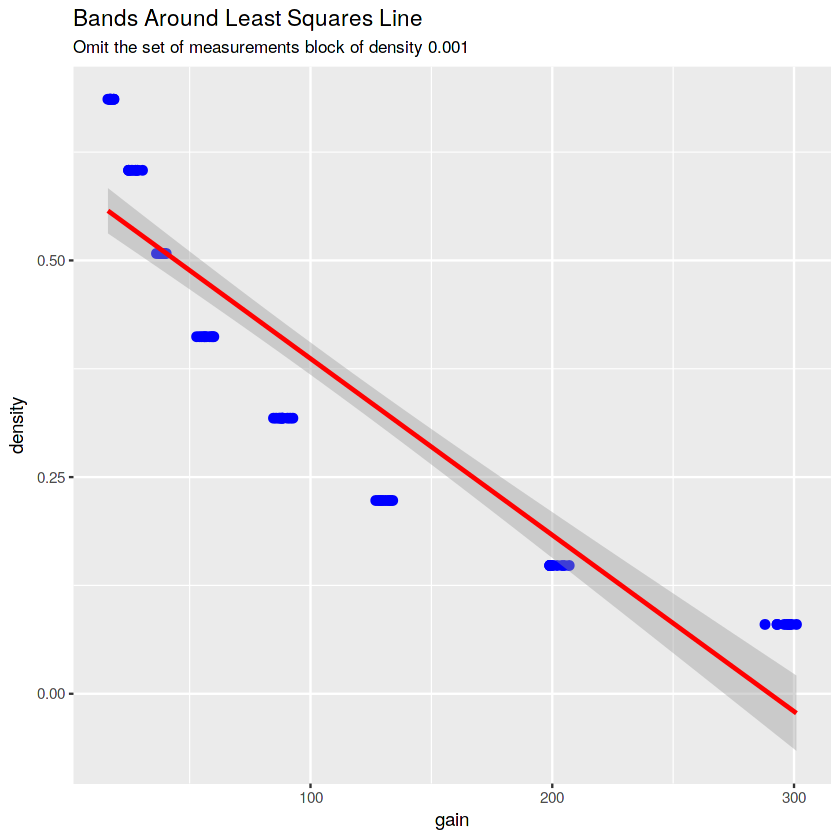

In [119]:
validationData = subset(data, data$density != 0.001)
crossValidationFitModel <- lm(formula = density ~ logx, data = validationData)
gain1 = log(38.6)
predict(logxFit, data.frame(logx = c(gain1)))
predict(crossValidationFitModel, data.frame(logx = c(gain1)), interval="confidence")
ggplot(validationData,aes(y = density,x=gain))+geom_point(col="blue",size=2)+labs(x="Gain",y="Density")+stat_smooth(method = "lm", se = TRUE,col='red',level=0.95) +
  labs(title = "Bands Around Least Squares Line", subtitle = "Omit the set of measurements block of density 0.001") +
  xlab("gain") + ylab("density")

cat("(Upper Bound - Lower Bound): ", (0.5125172 - 0.5047016), "\n")